## Dependencies

In [1]:
import os
import pickle
import sys
import pandas as pd
import numpy as np

# sklearn
from sklearn.metrics.pairwise import cosine_similarity
from dotenv import load_dotenv

Configure environment variable

In [2]:
# take environment variables from .env.  
load_dotenv()

# changing current directory to read dataset
os.chdir(os.getenv("DATASET_PATH"))

Setting max columns and rows

In [3]:
pd.set_option('display.max_columns', None)
pd.set_option("max_rows", None)

Loading datasets

In [4]:
# loading dataframes
with open('data_prepared_updated.pkl', 'rb') as file:
    data_prepared = pickle.load(file)
    
with open('complete_feature_set_playlist_vector_0.pkl', 'rb') as file:
    complete_feature_set_playlist_vector = pickle.load(file)
    
with open('complete_feature_set_nonplaylist_0.pkl', 'rb') as file:
    complete_feature_set_nonplaylist = pickle.load(file)

# Vector Similarites

- Cosine similarity 

Setting to recommend top n results

In [5]:
n = 50

In [6]:
non_playlist_df = pd.merge(data_prepared,complete_feature_set_nonplaylist["id"],how = "inner",on = "id")

In [7]:
non_playlist_df['cosine_sim'] = cosine_similarity(complete_feature_set_nonplaylist.drop('id', axis = 1).values, 
                                                  complete_feature_set_playlist_vector.values.reshape(1, -1))[:,0]

In [8]:
non_playlist_df_top_n = non_playlist_df.sort_values('cosine_sim',ascending = False).head(n)

Loading datasets

In [9]:
# loading dataframes
with open('list_of_playists_df.pkl', 'rb') as file:
    list_of_playists_df = pickle.load(file)

# The Beatles playlist
my_playlist  = list_of_playists_df[0]

# Generate Recommendations

- Create spotify connection
- Build playlist vectors
- Generate recommendations

In [10]:
my_playlist

,id,tracks,artist_names,date_added
0,6dGnYIeXmHdcikdzNNDMm2,Here Comes The Sun - Remastered 2009,The Beatles,2022-11-22 00:18:54+00:00
1,7iN1s7xHE4ifF5povM6A48,Let It Be - Remastered 2009,The Beatles,2022-11-22 00:18:57+00:00
2,1eT2CjXwFXNx6oY5ydvzKU,Hey Jude,The Beatles,2022-11-22 00:20:28+00:00


In [11]:
non_playlist_df_top_n.index = np.arange(1, len(non_playlist_df_top_n) + 1)
non_playlist_df_top_n

,id,name,artists,cosine_sim
1,2mxByJWOajjiVsLWjNXvDJ,Oh! Darling - Remastered 2009,[The Beatles],0.874304
2,4MLBqAEzNN89o2M9h92Z26,Get Back - Remastered 2009,[The Beatles],0.862029
3,5eZrW59C3UgBhkqNlowEID,Carry That Weight - Remastered 2009,[The Beatles],0.854154
4,4dkoqJrP0L8FXftrMZongF,Across The Universe - Remastered 2009,[The Beatles],0.846130
5,0pNeVovbiZHkulpGeOx1Gj,Something - Remastered 2009,[The Beatles],0.843543
6,3mlMpmY8oZIBFc39D9zLbh,The Long And Winding Road - Remastered 2009,[The Beatles],0.842174
7,4pbG9SUmWIvsROVLF0zF9s,I Want To Hold Your Hand - Remastered 2015,[The Beatles],0.826957
8,1Dg4dFJr3HW7sbA7vPejre,Eight Days A Week - Remastered 2009,[The Beatles],0.823670
9,5Qe7NHxeLAn8KoLTNLSdwe,I Want To Hold Your Hand - Remastered 2009,[The Beatles],0.823418
10,1gFNm7cXfG1vSMcxPpSxec,"Ob-La-Di, Ob-La-Da - Remastered 2009",[The Beatles],0.819414


**Comparing mix of songs playlist**

As you can see the song **"All You Need Is Love"** (17th in the list) and **"Yellow Submarine"** (43rd in the list) are in both the spotify recommendations and the recommendations from the vectorization method.

You can also see that there are a lot of similar artists and music styles when comparing both recommendations.

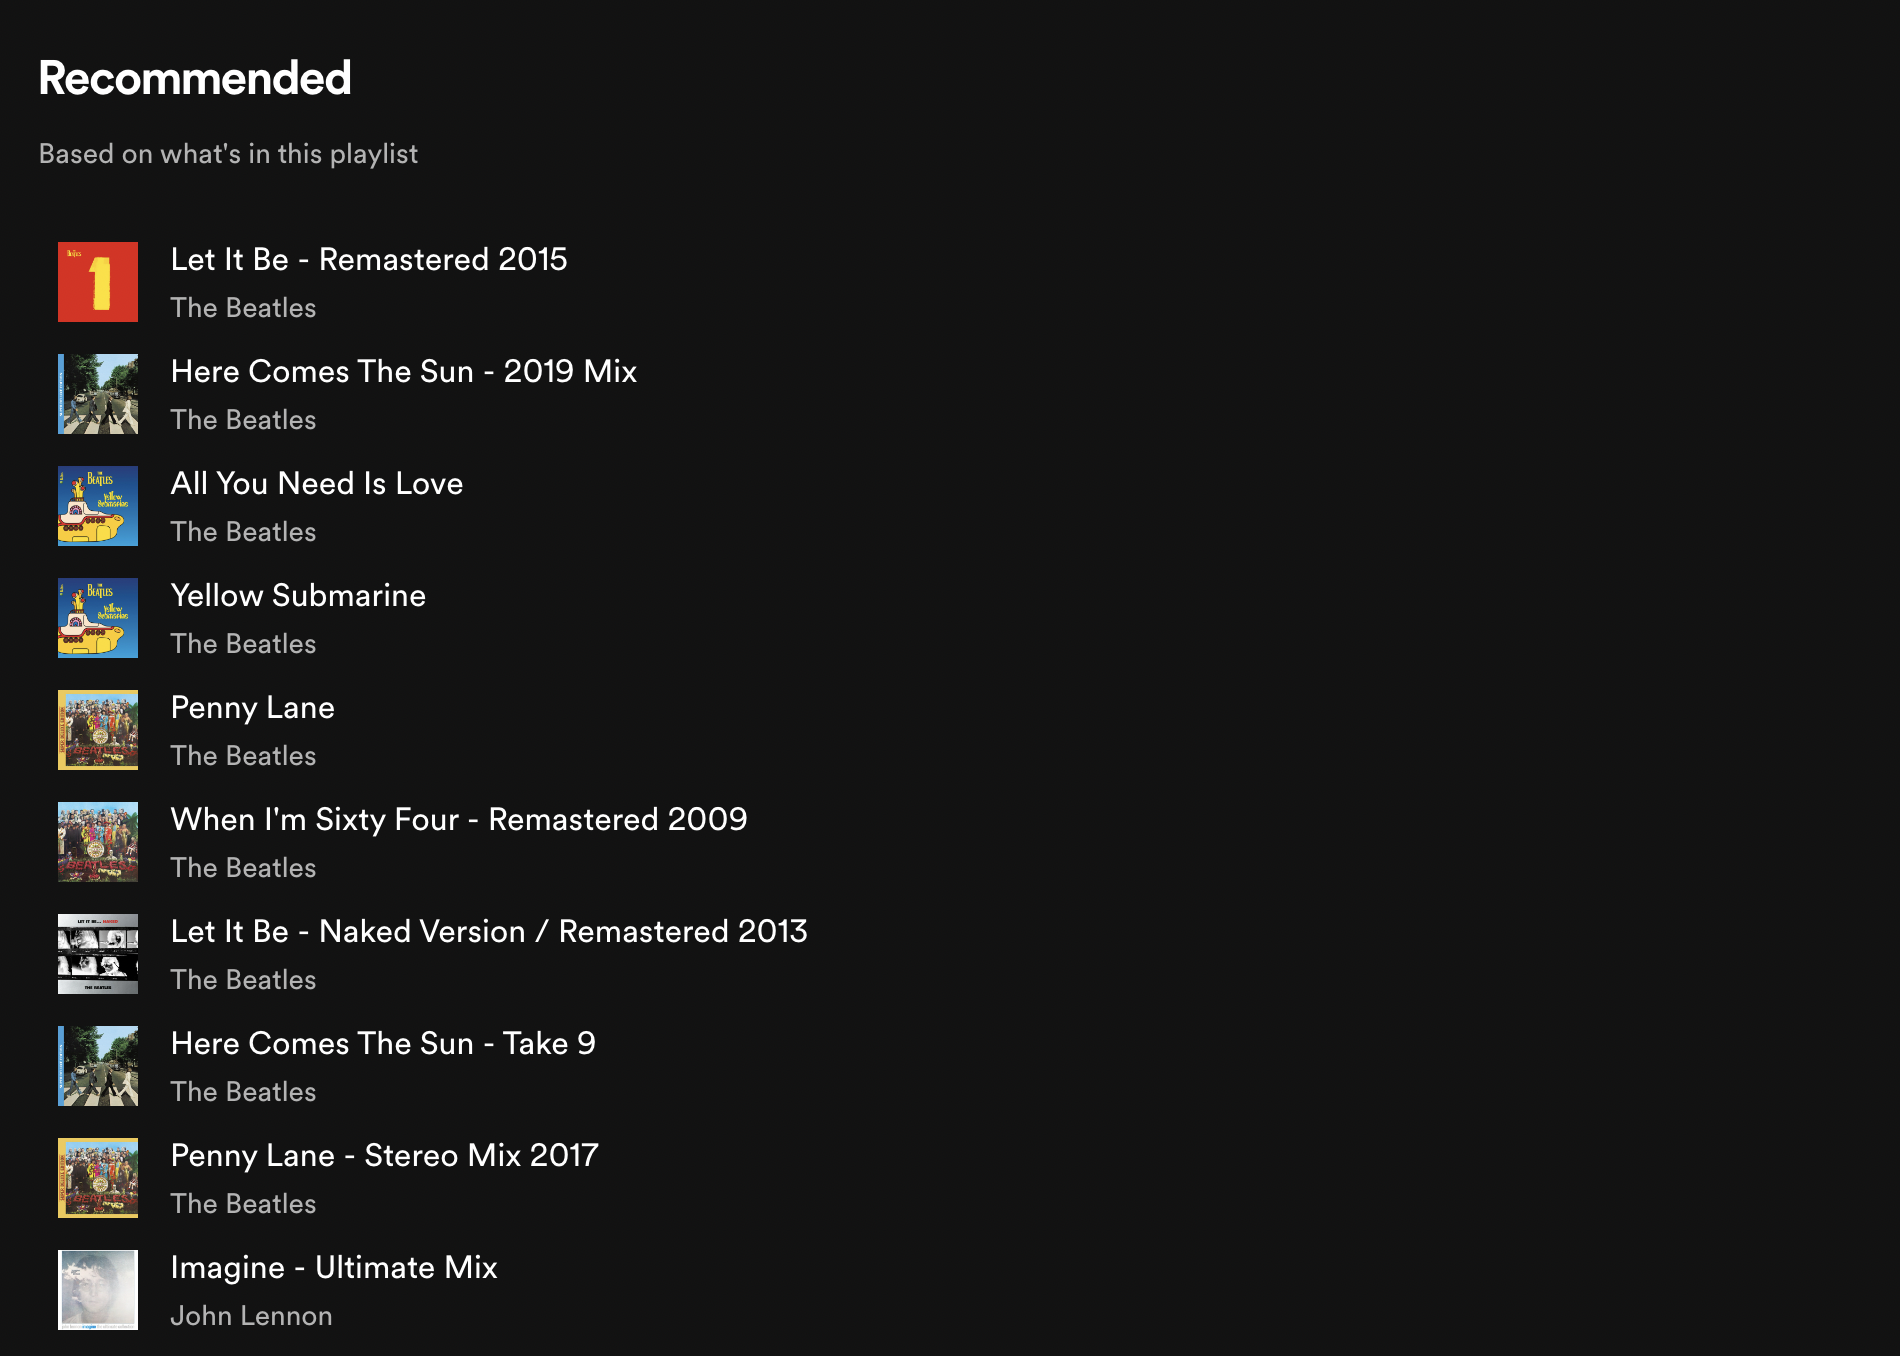